In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


Decision trees are another standard credit risk model. We will go beyond decision trees by using the trendy XGBoost package in Python to create gradient boosted trees. 

In [2]:
df = pd.read_csv('/Credit-Risk-Modelling/Datasets/loan_data_encoded.csv')
df.sample(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
10008,21,65000,5.0,5000,5.79,0,0.08,4,0,0,...,0,1,0,0,0,0,0,0,1,0
26334,30,100000,0.0,3600,10.99,0,0.04,10,1,0,...,0,1,0,0,0,0,0,0,1,0
29346,38,23868,0.0,7750,12.53,1,0.32,14,1,0,...,0,0,1,0,0,0,0,0,1,0
29100,33,45000,3.0,8000,16.49,1,0.18,7,1,0,...,0,0,0,0,1,0,0,0,1,0
3427,25,36400,4.0,11000,12.29,0,0.30,3,1,0,...,1,0,0,1,0,0,0,0,1,0
11750,25,80004,5.0,10000,9.62,0,0.12,4,0,0,...,0,0,1,0,0,0,0,0,1,0
16623,21,24000,5.0,2000,11.14,0,0.08,4,0,0,...,1,0,1,0,0,0,0,0,1,0
26811,29,42500,9.0,15000,7.88,1,0.35,7,0,0,...,1,1,0,0,0,0,0,0,1,0
15391,24,65000,8.0,15000,9.88,0,0.23,2,0,0,...,0,0,1,0,0,0,0,0,1,0
15501,23,140000,3.0,15000,15.58,0,0.11,3,1,0,...,0,0,0,0,1,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32574 non-null  int64  
 1   person_income                   32574 non-null  int64  
 2   person_emp_length               32574 non-null  float64
 3   loan_amnt                       32574 non-null  int64  
 4   loan_int_rate                   32574 non-null  float64
 5   loan_status                     32574 non-null  int64  
 6   loan_percent_income             32574 non-null  float64
 7   cb_person_cred_hist_length      32574 non-null  int64  
 8   person_home_ownership_MORTGAGE  32574 non-null  int64  
 9   person_home_ownership_OTHER     32574 non-null  int64  
 10  person_home_ownership_OWN       32574 non-null  int64  
 11  person_home_ownership_RENT      32574 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION   

Prepared data for model training


In [61]:
X = df.drop('loan_status', axis=1)
y = df[['loan_status']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=2)

In [6]:
# Train a model
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict probabilities of the model
gbt_preds = clf_gbt.predict_proba(X_test)

In [7]:
# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(np.round(gbt_preds[:,1][0:5] * 100, 2), columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

,loan_status,prob_default
0,0,3.28
1,0,0.65
2,0,6.30
3,0,10.75
4,0,3.08


In [8]:
# make a dataframe for both of models prob of defaults.
dataset = pd.DataFrame({'xgb_prob_default': gbt_preds[:, 1]})
dataset

,xgb_prob_default
0,0.032782
1,0.006460
2,0.063045
3,0.107470
4,0.030844
...,...
13025,0.018710
13026,0.010569
13027,0.083046
13028,0.008422


In [9]:
# load logistic regresion prob predictions
lr_pred = pd.read_csv('/Credit-Risk-Modelling/Datasets/lr_prob_predictions.csv', header=None)
lr_pred

,0,1
0,0.705878,0.294122
1,0.690896,0.309104
2,0.855474,0.144526
3,0.722377,0.277623
4,0.640028,0.359972
...,...,...
13025,0.739356,0.260644
13026,0.982599,0.017401
13027,0.893439,0.106561
13028,0.861436,0.138564


In [10]:
dataset['lr_prob_default'] = lr_pred[1]
dataset

,xgb_prob_default,lr_prob_default
0,0.032782,0.294122
1,0.006460,0.309104
2,0.063045,0.144526
3,0.107470,0.277623
4,0.030844,0.359972
...,...,...
13025,0.018710,0.260644
13026,0.010569,0.017401
13027,0.083046,0.106561
13028,0.008422,0.138564


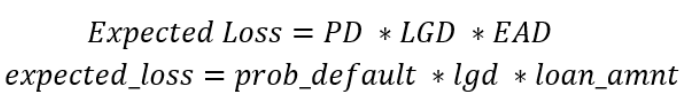

* We assume a LGD (loss given default) of 20%
* Loan amount of my data will be the exposure at default 

In [11]:
dataset['LGD'] = 0.2
dataset['EAD'] = X_test['loan_amnt'].values #  specified values so it doesn't yield nan values
dataset

,xgb_prob_default,lr_prob_default,LGD,EAD
0,0.032782,0.294122,0.2,7000
1,0.006460,0.309104,0.2,5000
2,0.063045,0.144526,0.2,4200
3,0.107470,0.277623,0.2,7000
4,0.030844,0.359972,0.2,12600
...,...,...,...,...
13025,0.018710,0.260644,0.2,10000
13026,0.010569,0.017401,0.2,10000
13027,0.083046,0.106561,0.2,8500
13028,0.008422,0.138564,0.2,4500


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13030 entries, 0 to 13029
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   xgb_prob_default  13030 non-null  float32
 1   lr_prob_default   13030 non-null  float64
 2   LGD               13030 non-null  float64
 3   EAD               13030 non-null  int64  
dtypes: float32(1), float64(2), int64(1)
memory usage: 356.4 KB


In [13]:
# Calculated the expected loss fro both models
dataset['xgb_expected_loss'] = dataset['xgb_prob_default'] * dataset['LGD'] * dataset['EAD']
dataset['lr_expected_loss'] = dataset['lr_prob_default'] * dataset['LGD'] * dataset['EAD']
dataset

,xgb_prob_default,lr_prob_default,LGD,EAD,xgb_expected_loss,lr_expected_loss
0,0.032782,0.294122,0.2,7000,45.894779,411.770432
1,0.006460,0.309104,0.2,5000,6.460193,309.104010
2,0.063045,0.144526,0.2,4200,52.957458,121.401540
3,0.107470,0.277623,0.2,7000,150.458498,388.672132
4,0.030844,0.359972,0.2,12600,77.727549,907.129080
...,...,...,...,...,...,...
13025,0.018710,0.260644,0.2,10000,37.419856,521.288817
13026,0.010569,0.017401,0.2,10000,21.138025,34.802887
13027,0.083046,0.106561,0.2,8500,141.178422,181.153550
13028,0.008422,0.138564,0.2,4500,7.580198,124.707799


In [14]:
# Print the sum of the expected loss for gbt
print('LR expected loss: ', np.sum(dataset['lr_expected_loss']))
print('XGB expected loss: ', np.sum(dataset['xgb_expected_loss']))

LR expected loss:  6165975.947916928
XGB expected loss:  6046466.023305291


When we talk about accuracy and precision, the goal is to generate models which have a low expected loss.

### Assesing Gradient Boosted tress
Making predictions for the actual class of the loan status

In [15]:
gbt_preds = clf_gbt.predict(X_test)

In [19]:
pd.value_counts(gbt_preds)

0    10796
1     2234
dtype: int64

In [25]:
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96     10215
     Default       0.94      0.75      0.84      2815

    accuracy                           0.94     13030
   macro avg       0.94      0.87      0.90     13030
weighted avg       0.94      0.94      0.93     13030



In [29]:
cm = confusion_matrix(y_test, gbt_preds)
cm


array([[10092,   123],
       [  704,  2111]], dtype=int64)

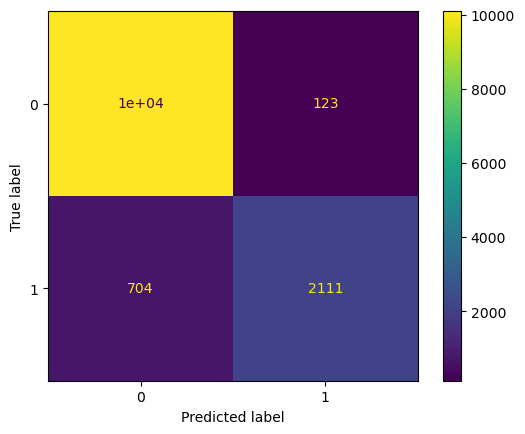

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_gbt.classes_)
disp.plot()
plt.show();

Manually calculating the classifications reports predictive power

In [38]:
# Precision – What percent of your predictions were correct?
# Precision is the ability of a classifier not to label an instance positive that is actually negative.
# precision = TP / (TP + FP)
precision = 2111 / (2111 + 123)
print(f'Precision Score: {precision}')

Precision Score: 0.9449418084153984


In [39]:
# Recall is the ability of a classifier to find all positive instances
# recall = TP / (TP + FN)
recall = 2111 / (2111 + 704)
print(f'Recall Score: {recall}')


Recall Score: 0.749911190053286


In [41]:
# The F1 score is a weighted harmonic mean of precision and recall 
# such that the best score is 1.0 and the worst is 0.0
# F1 should be used to compare classifier models, not global accuracy.
# f1 score =  2 * (recall *precision) / (recall + precision)
f1_score = 2 * (recall * precision) / (recall + precision)
print(f'F1 Score: {f1_score}')

F1 Score: 0.8362051891463657


Improving the model by checking column importances

In [42]:
clf_gbt.get_booster().get_score(importance_type='weight')

{'person_age': 256.0,
 'person_income': 826.0,
 'person_emp_length': 242.0,
 'loan_amnt': 317.0,
 'loan_int_rate': 461.0,
 'loan_percent_income': 280.0,
 'cb_person_cred_hist_length': 159.0,
 'person_home_ownership_MORTGAGE': 37.0,
 'person_home_ownership_OTHER': 3.0,
 'person_home_ownership_OWN': 40.0,
 'person_home_ownership_RENT': 65.0,
 'loan_intent_DEBTCONSOLIDATION': 64.0,
 'loan_intent_EDUCATION': 35.0,
 'loan_intent_HOMEIMPROVEMENT': 59.0,
 'loan_intent_MEDICAL': 82.0,
 'loan_intent_PERSONAL': 29.0,
 'loan_intent_VENTURE': 38.0,
 'loan_grade_A': 13.0,
 'loan_grade_B': 37.0,
 'loan_grade_C': 40.0,
 'loan_grade_D': 43.0,
 'loan_grade_E': 29.0,
 'loan_grade_F': 14.0,
 'loan_grade_G': 15.0,
 'cb_person_default_on_file_N': 25.0}

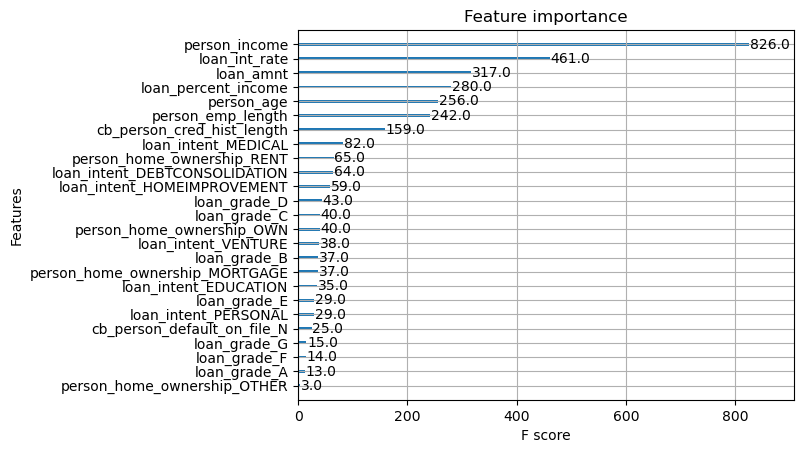

In [45]:
xgb.plot_importance(clf_gbt, importance_type='weight')
plt.show()

Now we know which columns matter most, we can created new train test datasets based on this info

In [64]:
X_new = df[['person_income', 'loan_int_rate', 'loan_amnt', 'loan_percent_income', 'person_age',
        'person_emp_length', 'cb_person_cred_hist_length']]

In [65]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size=0.4, 
                                                    random_state=2)

In [66]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_new_train,np.ravel(y_train))

# Print the column importances from the model
clf_gbt.get_booster().get_score(importance_type = 'weight')

{'person_income': 1101.0,
 'loan_int_rate': 718.0,
 'loan_amnt': 504.0,
 'loan_percent_income': 345.0,
 'person_age': 351.0,
 'person_emp_length': 370.0,
 'cb_person_cred_hist_length': 238.0}

In [67]:
gbt_preds = clf_gbt.predict(X_new_test)  # check model predictions

In [68]:
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.90      0.94      0.92     10215
     Default       0.75      0.63      0.68      2815

    accuracy                           0.87     13030
   macro avg       0.83      0.79      0.80     13030
weighted avg       0.87      0.87      0.87     13030



This column selection did worst than the original model with all the data available<br>
When the model is trained on different sets of columns it changes the performance, but does the importance for the same column change depending on which group it's in?

In [52]:
X2 = df[['loan_int_rate','person_emp_length']]
X3 = df[['person_income','loan_int_rate','loan_percent_income']]

In [53]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, 
                                                    test_size=0.4, 
                                                    random_state=2)

In [54]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, 
                                                    test_size=0.4, 
                                                    random_state=2)

### X2 feature importance

In [57]:
clf_gbt2 = xgb.XGBClassifier().fit(X2_train, np.ravel(y_train))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

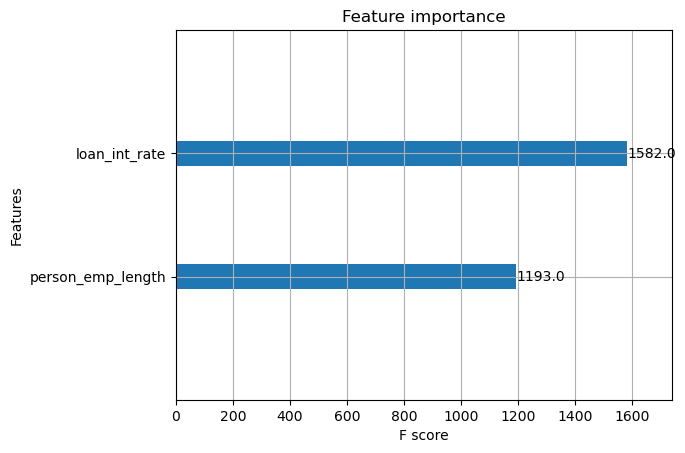

In [58]:
xgb.plot_importance(clf_gbt2, importance_type='weight')


### X3 Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

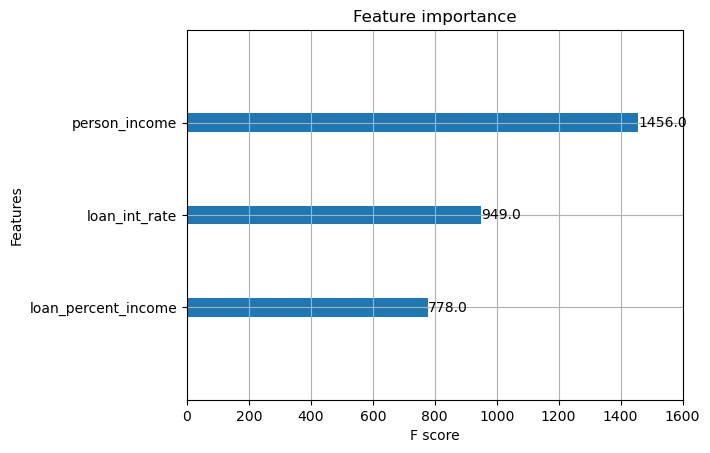

In [59]:
clf_gbt3 = xgb.XGBClassifier().fit(X3_train, np.ravel(y_train))
xgb.plot_importance(clf_gbt3, importance_type='weight')


## Cross validation

In [74]:
# set number of folds
n_folds = 2
# set early stopping number
stop = 5
# specified parameters
params = {'objective': 'binary:logistic',
          'seed': 99, 
          'eval_metric': 'auc'}

In [77]:
# structure train data for cross validation using dmatrix
cv_train = xgb.DMatrix(X_train, label=y_train)

# cross validation
xgb.cv(params, cv_train, num_boost_round=5, nfold=n_folds, early_stopping_rounds=stop)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.878633,0.001390,0.877199,0.002097
1,0.897900,0.003101,0.891804,0.000572
2,0.907764,0.002682,0.900042,0.000905
3,0.913543,0.001899,0.904756,0.002556
4,0.919514,0.000831,0.910045,0.003986


AUC for tran and test improves each iteration

In [80]:
# using cross validation from scikit-learn
gbt = xgb.XGBClassifier(learning_rate=0.4, max_depth=10, random_state=4)
cross_val_score(gbt, X_train, y_train, cv=5)

array([0.92862625, 0.92785879, 0.93195191, 0.93169609, 0.92784033])

Limits of cross validation

In [81]:
# 600 iterations of cross-validation
cv = xgb.cv(params, cv_train, num_boost_round = 600, nfold=10,
            shuffle = True)

In [82]:
cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.880134,0.002213,0.878676,0.008772
1,0.897184,0.003249,0.890132,0.011484
2,0.906026,0.002147,0.899629,0.012060
3,0.912998,0.002685,0.906464,0.009617
4,0.918052,0.002819,0.911652,0.009420
...,...,...,...,...
595,1.000000,0.000000,0.945025,0.004052
596,1.000000,0.000000,0.945014,0.003984
597,1.000000,0.000000,0.945012,0.003970
598,1.000000,0.000000,0.944998,0.003985


In [87]:
# Calculate the mean of the test AUC scores
np.mean(cv['test-auc-mean'])

0.945764543010997

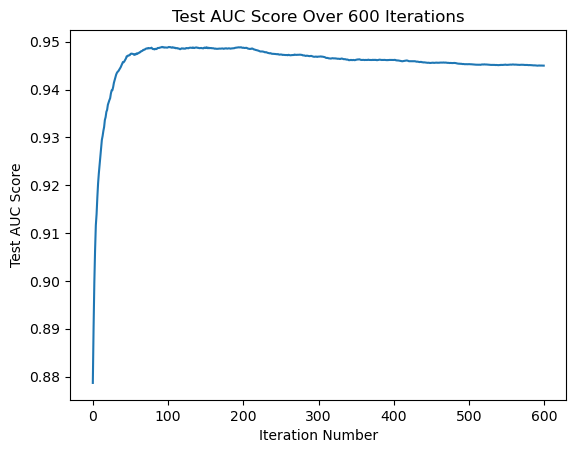

In [88]:
# # Plot the test AUC scores for each iteration
plt.plot(cv['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [89]:
cv['test-auc-mean'].max()

0.9489151958739974

In [93]:
# max test auc mean happens at iteration number 91
cv[cv['test-auc-mean'] == cv['test-auc-mean'].max()]

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
92,0.992986,0.000479,0.948915,0.004469


begins to decrease slightly after 100 iterations. This is because this much cross-validation can actually cause the model to become overfit